# Curso Ciencia de Datos 
## Integrantes : 
### Miguel Rodriguez -> Tutor Maximiliano
### Ricardo Vaisman -> Tutor Maximiliano
### Federico Sanchez -> Tutot Milagros



In [4]:
#Importo librerias
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

#Set de datos utilizado para el proyecto de Fraude 

df = pd.read_csv('transaction_dataset.csv')
print(df.shape)
df.head()##

(9841, 51)


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


# Análisis Univariado


## Analisis general

In [3]:
#Info generica del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [4]:
df.drop(['Unnamed: 0', 'Index', 'Address'], inplace=True, axis=1)

En el análisis general vemos que tenemos 51 variables, de estas solo FLAG, ERC20 most sent token type y ERC20_most_rec_token_type son variables categóricas. 

Las variables Unnamed:0, Index y Address no se van a utilizar ya que son variables que o son índices o el address de la cuenta que no tienen ninguna relación con nuestra variable objetivo. 

In [5]:
#Genero estadisticas simples
df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


Después se hizo un df.describe() sobre las variables continuas, y encontramos algo muy curioso en algunas variables y es que desde el percentil 25 al 75 el valor es cero, esto nos está diciendo que para algunas variables el 75% o más de los datos son un cero. Más adelante se hará el análisis a fondo de esta variables.  


## Variable target


In [6]:
print(f'Procentaje de transacciones no fraudulentas : {len(df.loc[df["FLAG"]==0])/len(df["FLAG"])*100}')
print(f'Procentaje de transacciones fraudulentas : {len(df.loc[df["FLAG"]==1])/len(df["FLAG"])*100}')

Procentaje de transacciones no fraudulentas : 77.85794126613149
Procentaje de transacciones fraudulentas : 22.14205873386851


Text(0.5, 1.0, 'Distribucion de la columna Target')

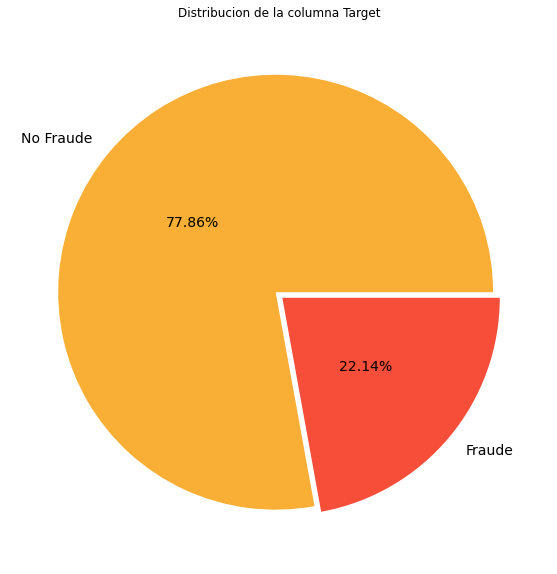

In [7]:
pie, ax = plt.subplots(figsize=[15,10])
labels = ['No Fraude', 'Fraude']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Distribucion de la columna Target')


#TODO no se por que no me lo muestra

En nuestra variable target tenemos 2179 ejemplos de fraude y 9841 ejemplos totales, lo que nos da un 22% de ejemplos de fraude en el data set. Esto quiere decir que tenemos un dataset desbalanceado y que antes de hacer el modelo tendremos que emplear alguna técnica para balancear o si no podemos entrenar el modelo a pensar que todos los casos no son fraude. 


## Nulos y valores en cero


In [8]:
percent_missing = df.isnull().sum() / len(df) * 100
df_summary = percent_missing.to_frame(name='null percent')

# Cuenta los valores que no son ceros 
non_zeros = (df[:] != 0).sum()/ len(df) * 100
df_summary2 = non_zeros.to_frame(name='non-zero percent')

df_summary = df_summary.merge(df_summary2, left_index=True, right_index=True)
df_summary['non-null non-zero'] = df_summary['non-zero percent'] - df_summary['null percent']
df_summary.sort_values(by='non-null non-zero')

,null percent,non-zero percent,non-null non-zero
ERC20 avg time between contract tnx,8.423941,8.423941,0.000000
ERC20 avg time between rec 2 tnx,8.423941,8.423941,0.000000
ERC20 avg val sent contract,8.423941,8.423941,0.000000
ERC20 max val sent contract,8.423941,8.423941,0.000000
ERC20 min val sent contract,8.423941,8.423941,0.000000
ERC20 avg time between rec tnx,8.423941,8.423941,0.000000
ERC20 avg time between sent tnx,8.423941,8.423941,0.000000
min value sent to contract,0.000000,0.020323,0.020323
total ether sent contracts,0.000000,0.030485,0.030485
avg value sent to contract,0.000000,0.030485,0.030485


In [9]:
#Dropeamos las columnas que son insignificativas y no aportan valor. 
columns = [' ERC20 avg time between contract tnx',
' ERC20 avg time between rec 2 tnx',
' ERC20 avg val sent contract',
' ERC20 max val sent contract',
' ERC20 min val sent contract',
' ERC20 avg time between rec tnx',
' ERC20 avg time between sent tnx',
'min value sent to contract',
'total ether sent contracts',
'avg value sent to contract',
'max val sent to contract',
' ERC20 total Ether sent contract',
' ERC20 uniq sent addr.1']

df_copy = df
df.drop(columns, axis =1 , inplace = True)

Como se puede observar las primeras 13 variables de esta lista tienen menos del 0.3% de valores distintos a cero o nulo, es decir menos de 30 datos en un dataset de 9841 registros. Consideramos que estas variables no deberían entrar en el modelo porque no aportan información al problema ya que más del 99,7% de los datos van a ser nulos o cero. 

Además observamos que las variables que tienen valores nulos son las de ERC20 que es un protocolo de ETH. Lo que parece indicarnos que esas cuentas no hicieron ninguna transacción por ese protocolo. Con esto pensamos agregar otra variables que indique si tiene información sobre las transacciones ERC20 o no. 


#  Correlacion de la variable Target

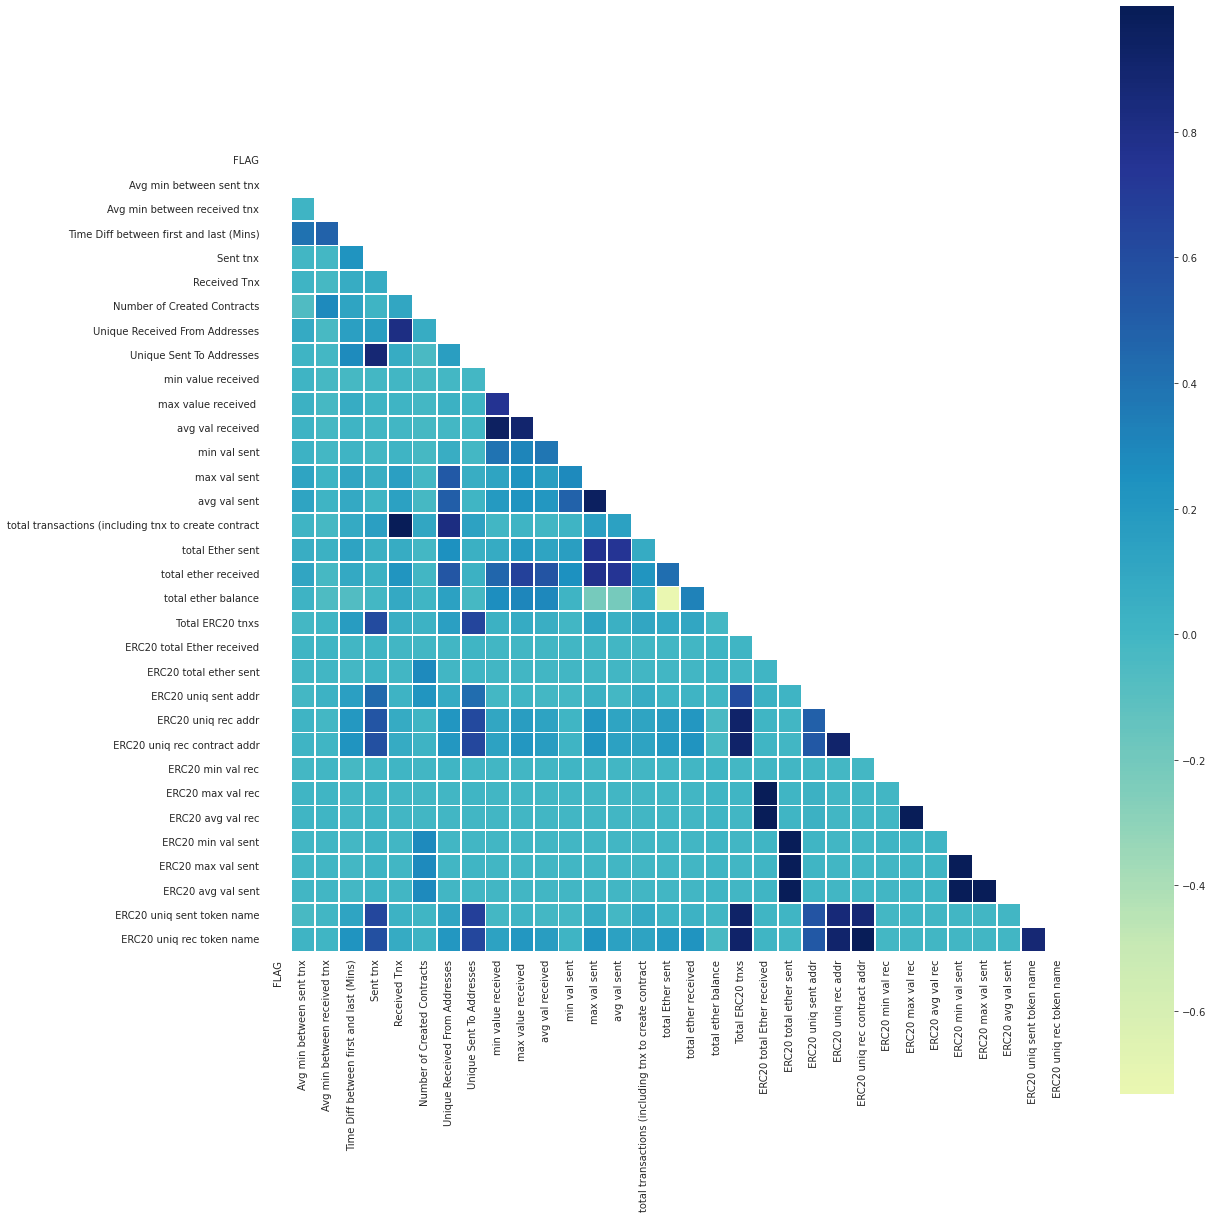

In [10]:
# Correlacion para Fraudes
df_fraud = df[df['FLAG']==1]
corr = df_fraud.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

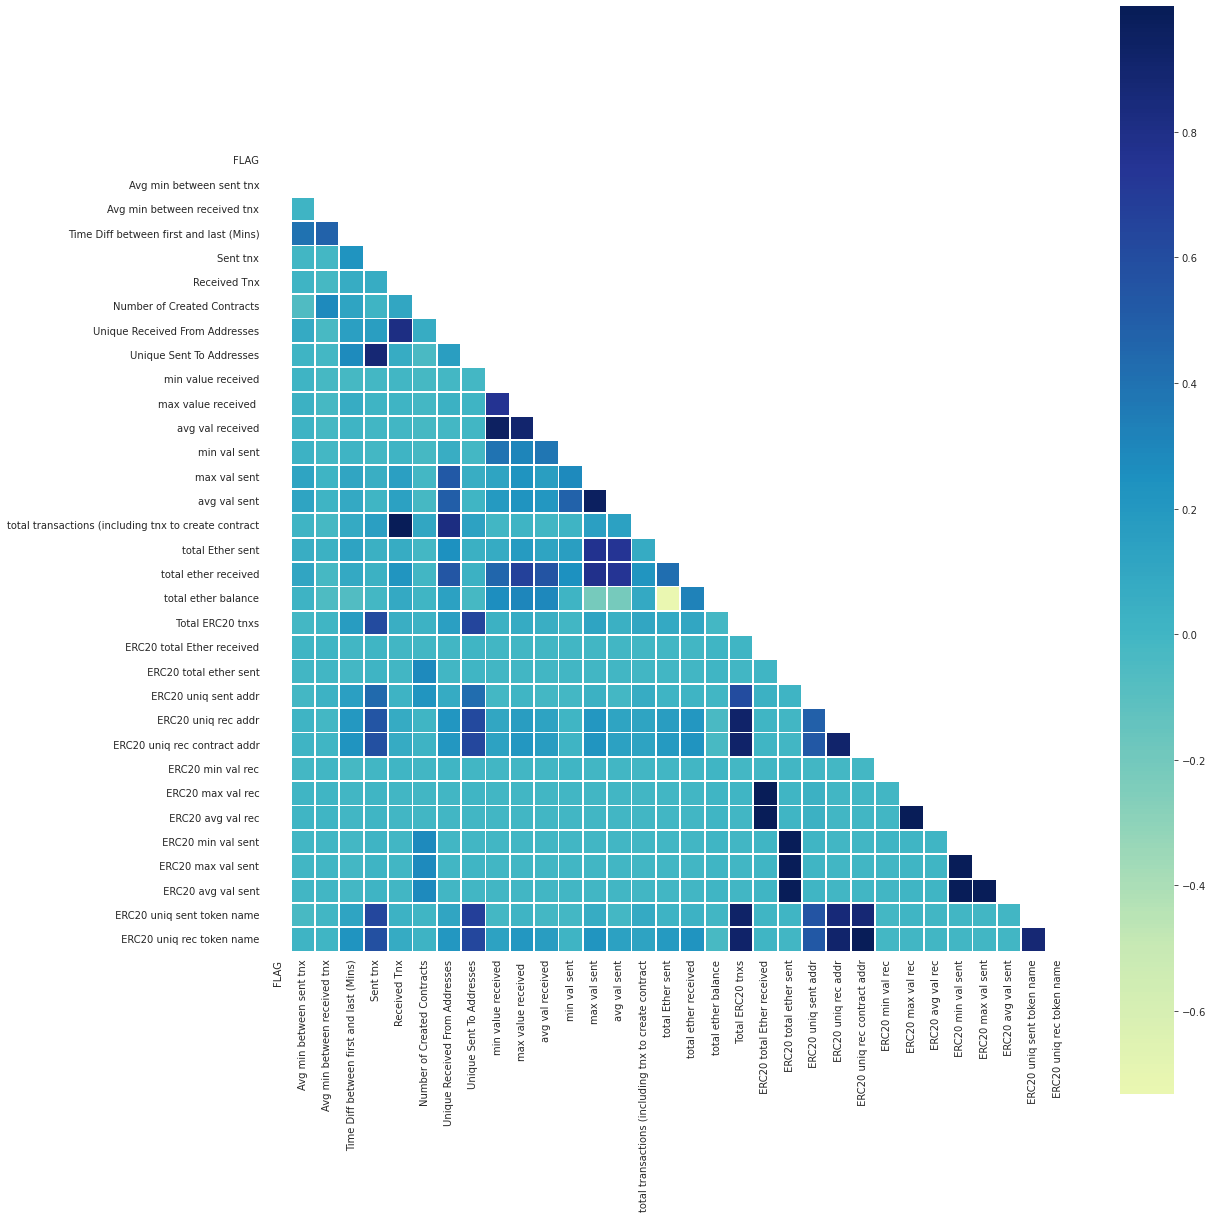

In [11]:
# Correlacion para NO Fraudes
df_not_fraud = df[df['FLAG']==0]
corr = df_fraud.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

Podemos observar las distintas correlaciones que tienen las variables entre sí para un Fraude o una transacción sin Fraude. Tenemos una fuerte correlación en variables que representa el protocolo de ETH.



## Limpieza variables categóricas


In [17]:
#cambiar los valores 0 a nulos, porque un valor 0 no significa nada en las variables categóricas
df[' ERC20_most_rec_token_type'].replace({'0':np.NaN},inplace = True)
df[' ERC20 most sent token type'].replace({'0':np.NaN},inplace = True)

In [18]:
#Promedio de Nan
print(df[' ERC20 most sent token type'].isnull().sum()/len(df))
print(df[' ERC20 most sent token type'].max)

0.5324662127832538
<bound method NDFrame._add_numeric_operations.<locals>.max of 0            Cofoundit
1       Livepeer Token
2                 None
3               Raiden
4        StatusNetwork
             ...      
9836                  
9837                  
9838                  
9839               NaN
9840                  
Name:  ERC20 most sent token type, Length: 9841, dtype: object>


In [19]:
##Promedio de Nan
print(df[' ERC20_most_rec_token_type'].isnull().sum()/len(df))
print(df[' ERC20_most_rec_token_type'].max)

0.5334823696778782
<bound method NDFrame._add_numeric_operations.<locals>.max of 0                              Numeraire
1                         Livepeer Token
2                                  XENON
3                                  XENON
4                                    EOS
                      ...               
9836                          GSENetwork
9837               Blockwell say NOTSAFU
9838    Free BOB Tokens - BobsRepair.com
9839                                 NaN
9840                          INS Promo1
Name:  ERC20_most_rec_token_type, Length: 9841, dtype: object>


Se hace una pequeña limpieza para las variables categoricas, el valor 0 para este tipo de variables es insignificativo. Consideramos que es mejor aplicar un valor NaN para representar valores sin sentido

## Bar charts

array([[<AxesSubplot:title={'center':'FLAG'}>,
        <AxesSubplot:title={'center':'Avg min between sent tnx'}>,
        <AxesSubplot:title={'center':'Avg min between received tnx'}>,
        <AxesSubplot:title={'center':'Time Diff between first and last (Mins)'}>,
        <AxesSubplot:title={'center':'Sent tnx'}>,
        <AxesSubplot:title={'center':'Received Tnx'}>],
       [<AxesSubplot:title={'center':'Number of Created Contracts'}>,
        <AxesSubplot:title={'center':'Unique Received From Addresses'}>,
        <AxesSubplot:title={'center':'Unique Sent To Addresses'}>,
        <AxesSubplot:title={'center':'min value received'}>,
        <AxesSubplot:title={'center':'max value received '}>,
        <AxesSubplot:title={'center':'avg val received'}>],
       [<AxesSubplot:title={'center':'min val sent'}>,
        <AxesSubplot:title={'center':'max val sent'}>,
        <AxesSubplot:title={'center':'avg val sent'}>,
        <AxesSubplot:title={'center':'total transactions (including 

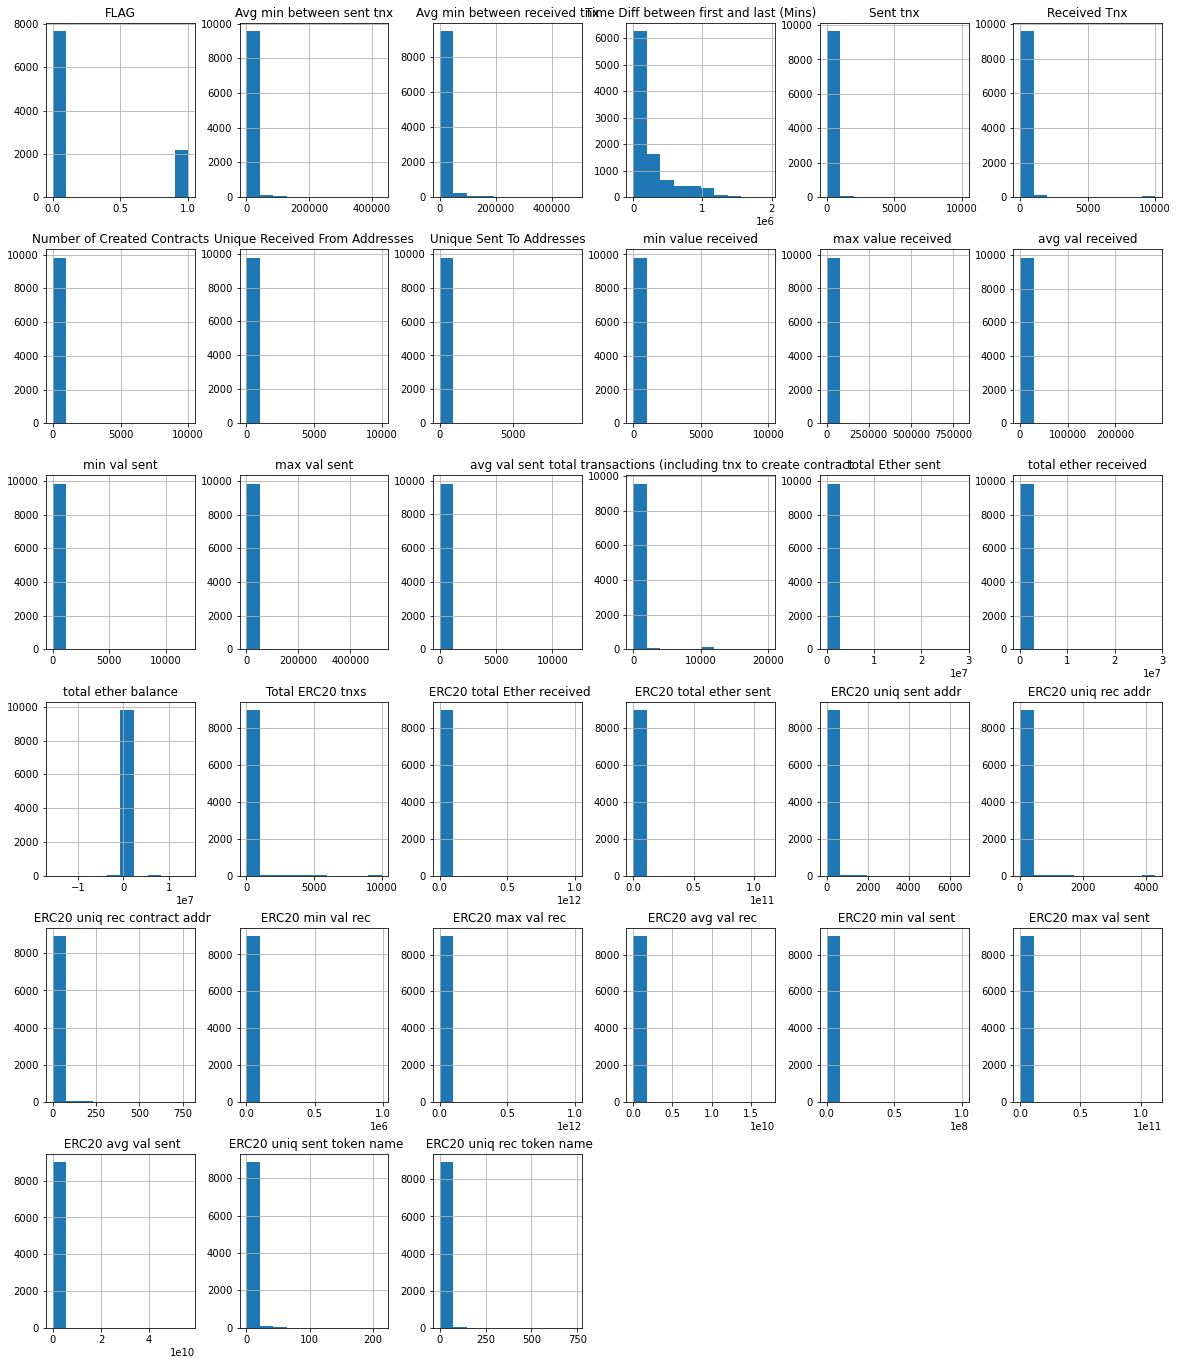

In [20]:
#Genero un grafico para columna , en la cual puedo observar la cantidad de sus distintos valores.
df.hist(figsize=(20,24), bins=10)

Como varias variables tienen una gran densidad de datos cerca de los valores a cero, estamos pensando en hacer dos tipos de modelos. uno que incluya esos valores extremos y otro sin esos valores extremos para ver cómo se comportan los modelos.

## Análisis de frecuencias Categóricas

In [32]:
# ERC20 most sent token type
frec = df[' ERC20 most sent token type'].value_counts()
frec_df = pd.DataFrame(frec)
frec_df.rename(columns={' ERC20 most sent token type':'Frec_abs'},inplace=True)
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum

#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = 100 * frec_df["Frec_abs"]/len(df[' ERC20 most sent token type'])

#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
None,1856,1856,18.859872,18.859872
,1191,3047,12.102429,30.962301
EOS,138,3185,1.402297,32.364597
OmiseGO,137,3322,1.392135,33.756732
Golem,130,3452,1.321004,35.077736
...,...,...,...,...
Merculet,1,4597,0.010162,46.712732
LocalCoinSwap dividend token 2019Q1,1,4598,0.010162,46.722894
EduCoin,1,4599,0.010162,46.733056
Dochain,1,4600,0.010162,46.743217


In [33]:
#' ERC20 most sent token type'
frec = df[' ERC20_most_rec_token_type'].value_counts()
frec_df = pd.DataFrame(frec)
frec_df.rename(columns={' ERC20_most_rec_token_type':'Frec_abs'},inplace=True)
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum

#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = 100 * frec_df["Frec_abs"]/len(df[' ERC20_most_rec_token_type'])

#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
OmiseGO,873,873,8.871050,8.871050
Blockwell say NOTSAFU,779,1652,7.915862,16.786912
DATAcoin,358,2010,3.637842,20.424754
Livepeer Token,207,2217,2.103445,22.528198
EOS,161,2378,1.636013,24.164211
...,...,...,...,...
Fair Token,1,4587,0.010162,46.611117
WAX Token,1,4588,0.010162,46.621278
Primas,1,4589,0.010162,46.631440
Enumivo,1,4590,0.010162,46.641601


Para las 2 variables categóricas podemos observar que la frecuencia es en promedio baja.

In [34]:
df.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 uniq sent addr',
       ' ERC20 uniq rec addr', ' ERC20 uniq rec contract addr',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 uniq sent token name', ' ERC20 uniq rec token name',
       ' ERC20 most sent token type', ' ERC20_most_rec_token_type'],
      dtype='ob

<ipython-input-35-6d75148492e6>:16: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(wspace = 0.7, hspace=0.8)


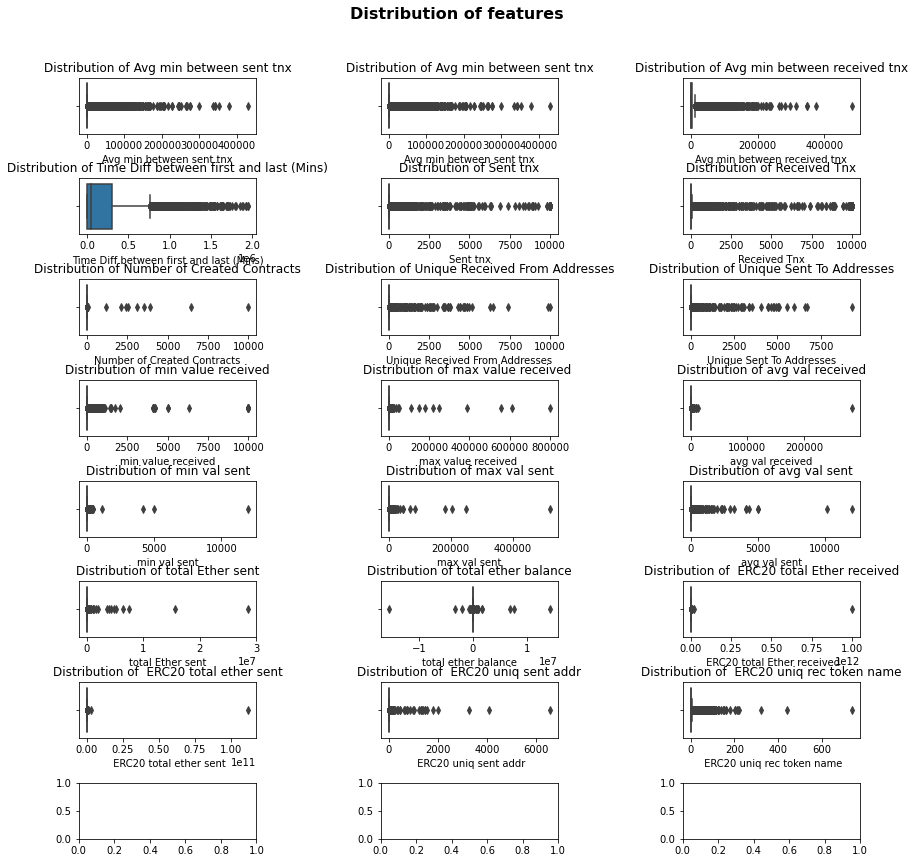

In [35]:
# Analisis de la distribucion usando boxplots
columns = ['FLAG', 'Avg min between sent tnx', 
           'Avg min between sent tnx','Avg min between received tnx',  
           'Time Diff between first and last (Mins)', 'Sent tnx', 
           'Received Tnx', 'Number of Created Contracts', 
           'Unique Received From Addresses', 'Unique Sent To Addresses', 
           'min value received', 'max value received ', 'avg val received',
           'min val sent', 'max val sent', 'avg val sent',
            'total Ether sent', 
           'total ether balance', ' ERC20 total Ether received', 
           ' ERC20 total ether sent', ' ERC20 uniq sent addr', ' ERC20 uniq rec token name']

       

fig, axes = plt.subplots(8, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=16, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=df_copy, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=df_copy, x=columns[2])
ax1.set_title(f'Distribution of {columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=df_copy, x=columns[3])
ax2.set_title(f'Distribution of {columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=df_copy, x=columns[4])
ax3.set_title(f'Distribution of {columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=df_copy, x=columns[5])
ax4.set_title(f'Distribution of {columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=df_copy, x=columns[6])
ax5.set_title(f'Distribution of {columns[6]}')

ax6 = sns.boxplot(ax = axes[2,0], data=df_copy, x=columns[7])
ax6.set_title(f'Distribution of {columns[7]}')

ax7 = sns.boxplot(ax = axes[2,1], data=df_copy, x=columns[8])
ax7.set_title(f'Distribution of {columns[8]}')

ax8 = sns.boxplot(ax = axes[2,2], data=df_copy, x=columns[9])
ax8.set_title(f'Distribution of {columns[9]}')

ax9 = sns.boxplot(ax = axes[3,0], data=df_copy, x=columns[10])
ax9.set_title(f'Distribution of {columns[10]}')
 
ax10 = sns.boxplot(ax = axes[3,1], data=df_copy, x=columns[11])
ax10.set_title(f'Distribution of {columns[11]}')

ax11 = sns.boxplot(ax = axes[3,2], data=df_copy, x=columns[12])
ax11.set_title(f'Distribution of {columns[12]}')
 
ax12 = sns.boxplot(ax = axes[4,0], data=df_copy, x=columns[13])
ax12.set_title(f'Distribution of {columns[13]}')
 
ax13 = sns.boxplot(ax = axes[4,1], data=df_copy, x=columns[14])
ax13.set_title(f'Distribution of {columns[14]}')
 
ax14 = sns.boxplot(ax = axes[4,2], data=df_copy, x=columns[15])
ax14.set_title(f'Distribution of {columns[15]}')
 
ax15 = sns.boxplot(ax = axes[5,0], data=df_copy, x=columns[16])
ax15.set_title(f'Distribution of {columns[16]}')

ax15 = sns.boxplot(ax = axes[5,1], data=df_copy, x=columns[17])
ax15.set_title(f'Distribution of {columns[17]}')

ax15 = sns.boxplot(ax = axes[5,2], data=df_copy, x=columns[18])
ax15.set_title(f'Distribution of {columns[18]}')

ax15 = sns.boxplot(ax = axes[6,0], data=df_copy, x=columns[19])
ax15.set_title(f'Distribution of {columns[19]}')

ax15 = sns.boxplot(ax = axes[6,1], data=df_copy, x=columns[20])
ax15.set_title(f'Distribution of {columns[20]}')

ax15 = sns.boxplot(ax = axes[6,2], data=df_copy, x=columns[21])
ax15.set_title(f'Distribution of {columns[21]}')


 

plt.show()

La gran mayoría de la dispersión tiene más al valor cero. Es una particularidad que se da en la mayoría de las variables

# Analisis Bivariado


<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 min val rec'>

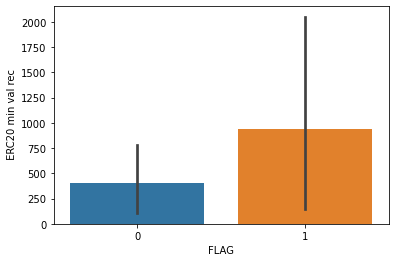

In [36]:
# FLAG VS ERC20 min val rec
sns.barplot(x='FLAG' , y = " ERC20 min val rec", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 max val rec'>

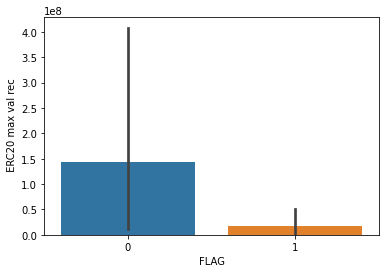

In [37]:
# Flag vs ERC20 max val rec
sns.barplot(x='FLAG' , y = " ERC20 max val rec", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 avg val rec'>

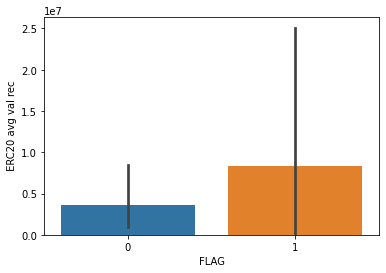

In [38]:
#Flag vs ERC20 avg val rec
sns.barplot(x='FLAG' , y = " ERC20 avg val rec", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 min val sent'>

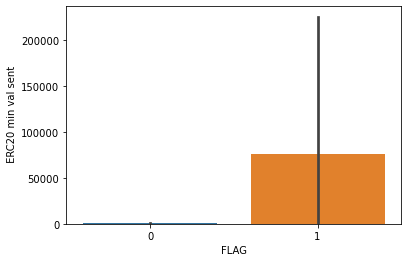

In [39]:
# Flag vs ER20 MIN VAL SENT
sns.barplot(x='FLAG' , y = " ERC20 min val sent", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 max val sent'>

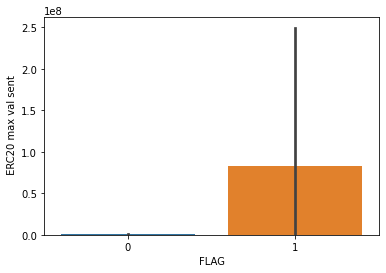

In [40]:
# Flag vs ERC20 max val sent
sns.barplot(x='FLAG' , y = " ERC20 max val sent", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 avg val sent'>

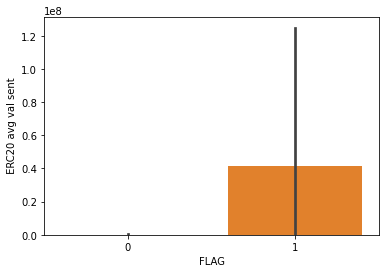

In [41]:
#FLAG vs ERC20 avg val sent
sns.barplot(x='FLAG' , y = " ERC20 avg val sent", data=df)

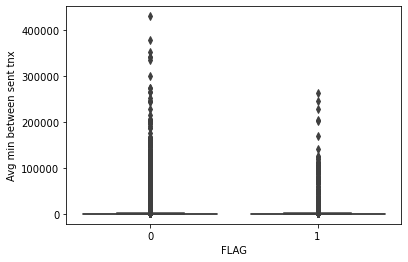

In [42]:
sns.boxplot(x='FLAG', y='Avg min between sent tnx', data=df)

plt.show()

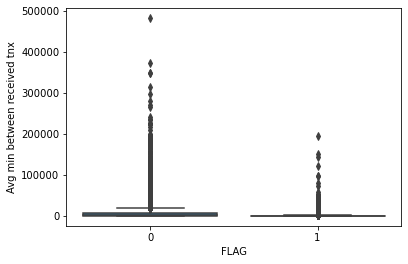

In [43]:
sns.boxplot(x='FLAG', y='Avg min between received tnx', data=df)

plt.show()

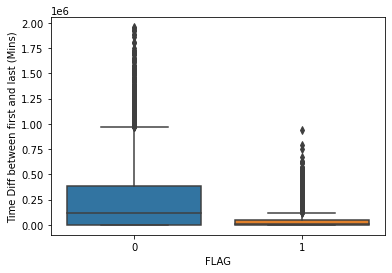

In [44]:
sns.boxplot(x='FLAG', y='Time Diff between first and last (Mins)', data=df)

plt.show()

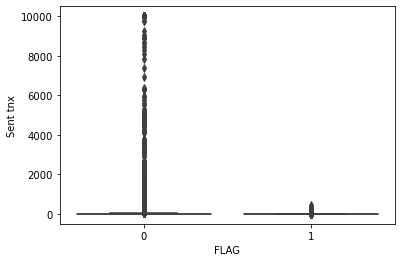

In [45]:
sns.boxplot(x='FLAG', y='Sent tnx', data=df)

plt.show()

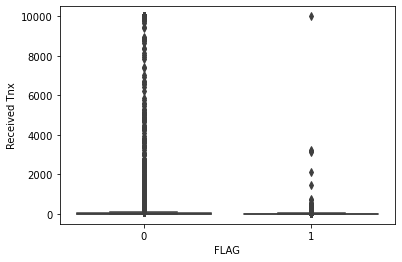

In [46]:
sns.boxplot(x='FLAG', y='Received Tnx', data=df)

plt.show()

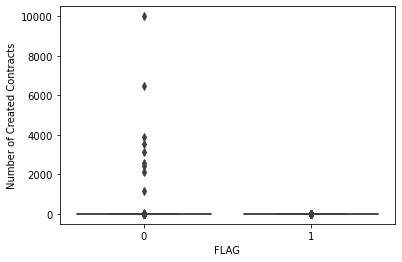

In [47]:
sns.boxplot(x='FLAG', y='Number of Created Contracts', data=df)

plt.show()

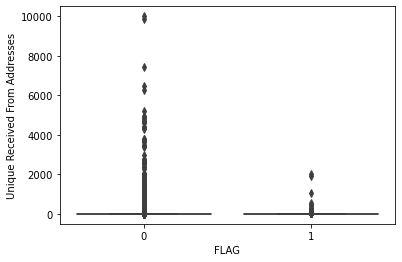

In [48]:
sns.boxplot(x='FLAG', y='Unique Received From Addresses', data=df)

plt.show() 

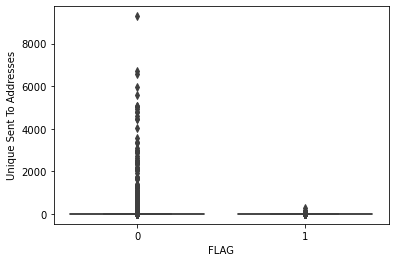

In [49]:
sns.boxplot(x='FLAG', y='Unique Sent To Addresses', data=df)

plt.show() 

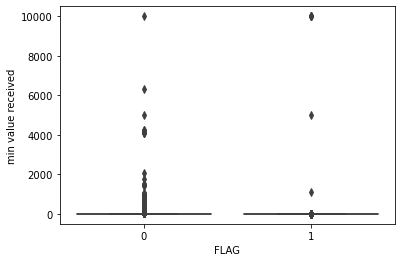

In [50]:
sns.boxplot(x='FLAG', y='min value received', data=df)

plt.show() 

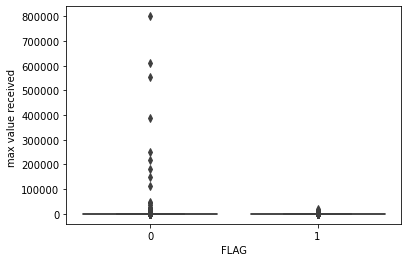

In [51]:
sns.boxplot(x='FLAG', y='max value received ', data=df)

plt.show() 

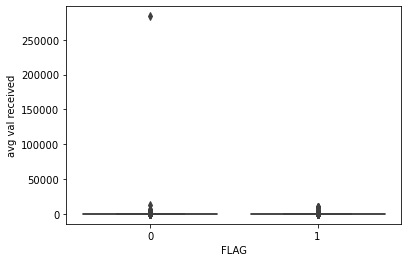

In [52]:
sns.boxplot(x='FLAG', y='avg val received', data=df)

plt.show() 

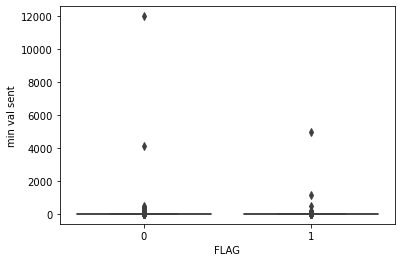

In [53]:
sns.boxplot(x='FLAG', y='min val sent', data=df)

plt.show() 

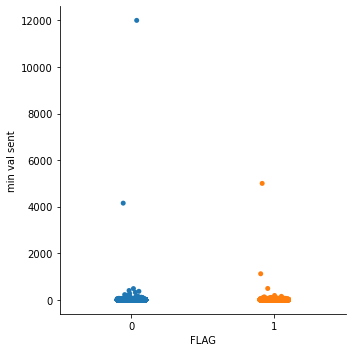

In [54]:
sns.catplot(x='FLAG', y='min val sent', data=df)

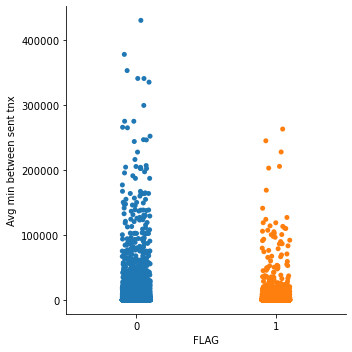

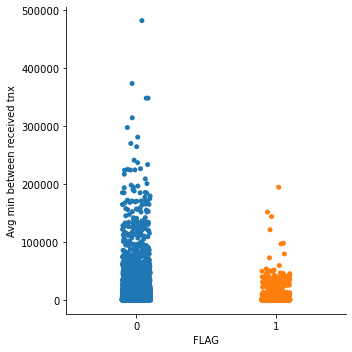

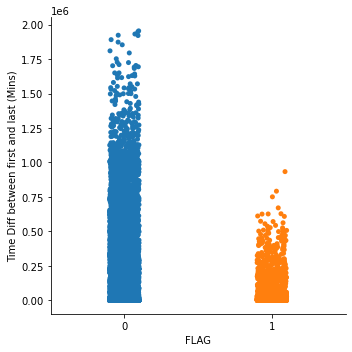

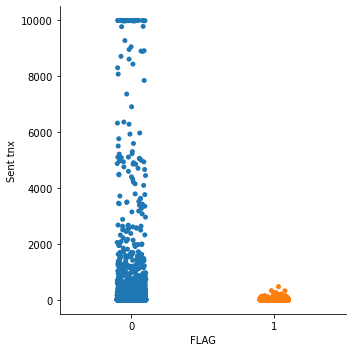

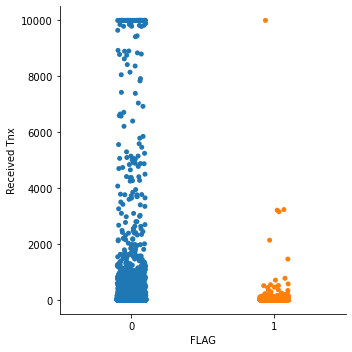

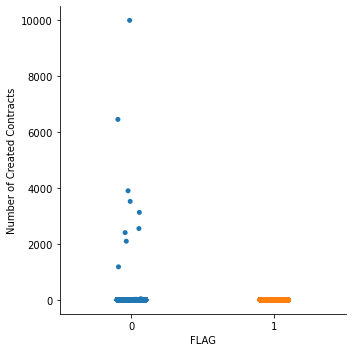

In [56]:
sns.catplot(x='FLAG', y='Avg min between sent tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Avg min between received tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Time Diff between first and last (Mins)', data=df)

plt.show()

sns.catplot(x='FLAG', y='Sent tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Received Tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Number of Created Contracts', data=df)

plt.show()



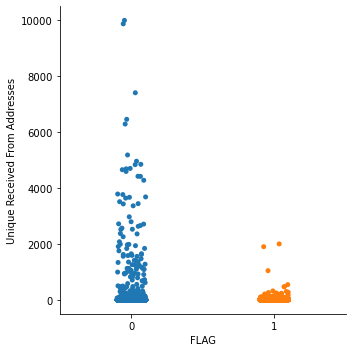

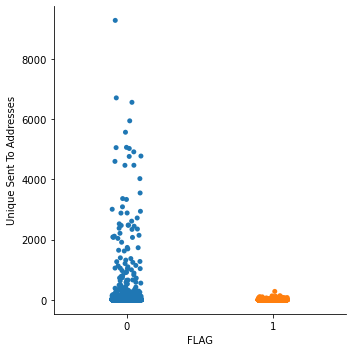

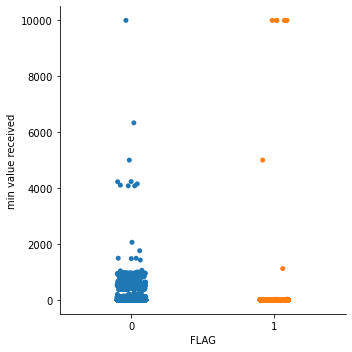

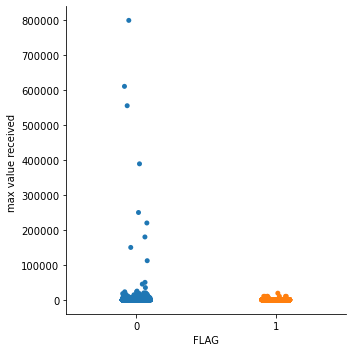

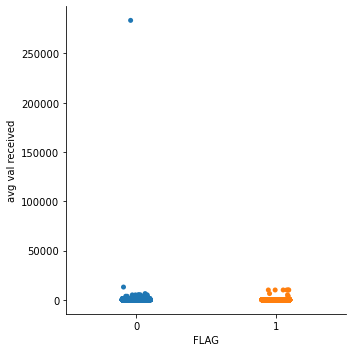

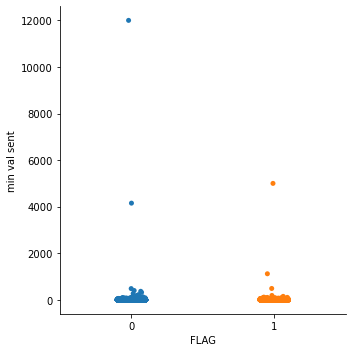

In [57]:
sns.catplot(x='FLAG', y='Unique Received From Addresses', data=df)
plt.show() 

sns.catplot(x='FLAG', y='Unique Sent To Addresses', data=df)
plt.show() 

sns.catplot(x='FLAG', y='min value received', data=df)
plt.show() 

sns.catplot(x='FLAG', y='max value received ', data=df)
plt.show() 

sns.catplot(x='FLAG', y='avg val received', data=df)
plt.show() 

sns.catplot(x='FLAG', y='min val sent', data=df)
plt.show() 

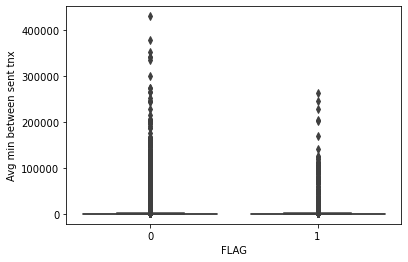

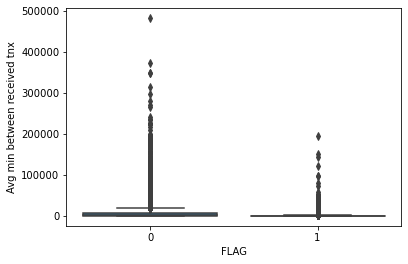

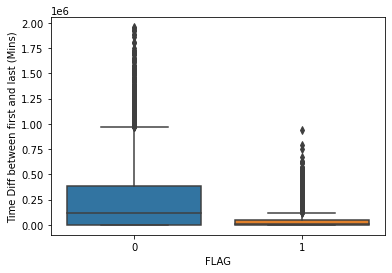

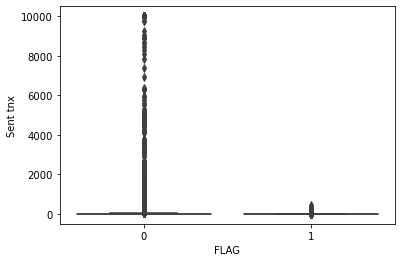

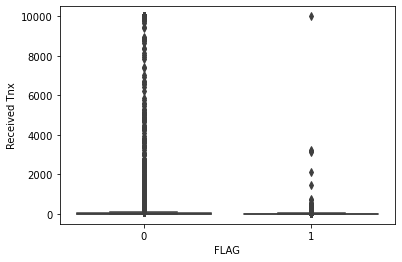

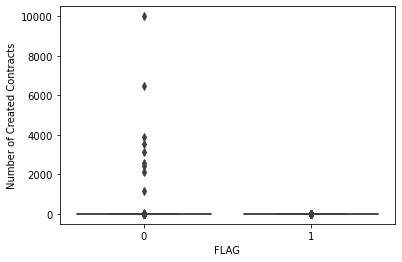

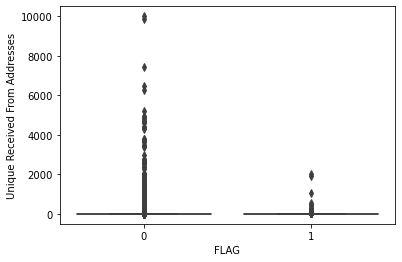

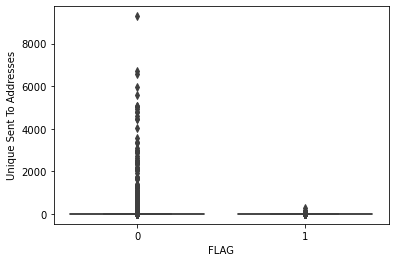

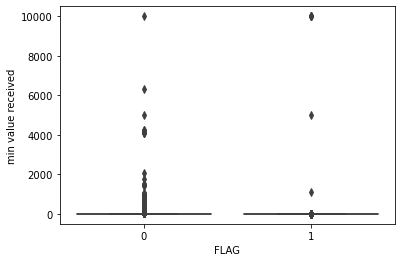

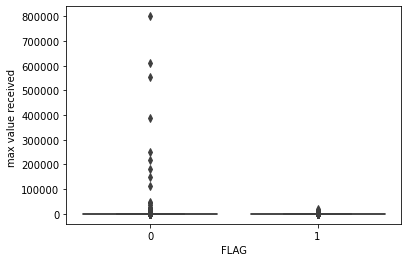

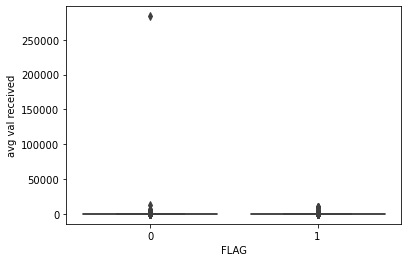

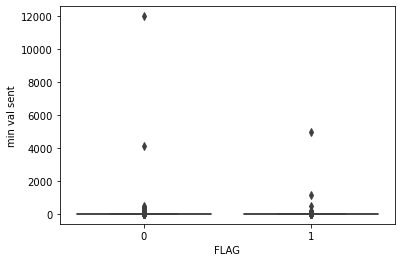

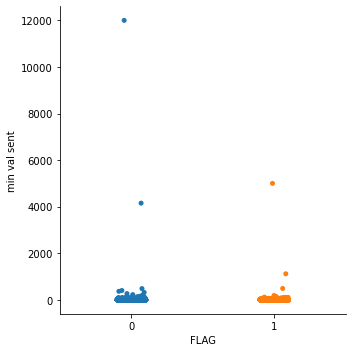

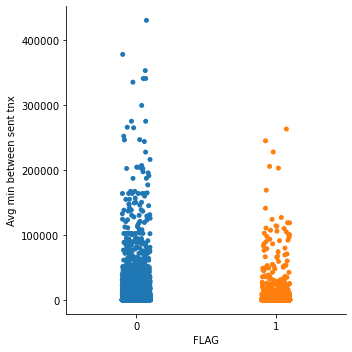

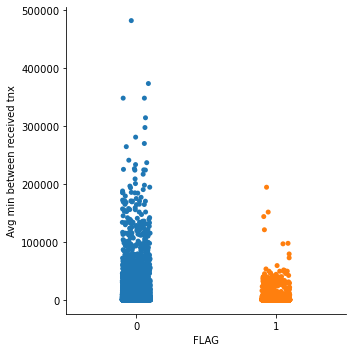

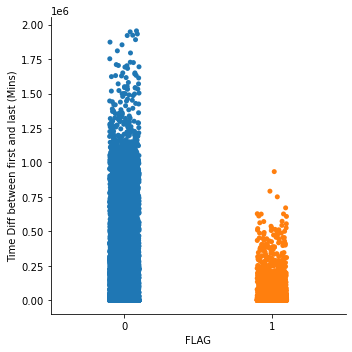

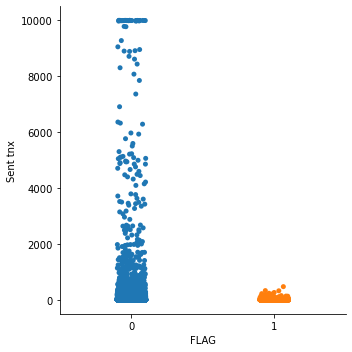

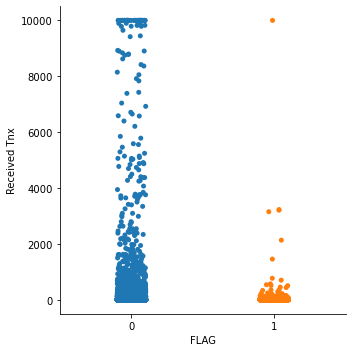

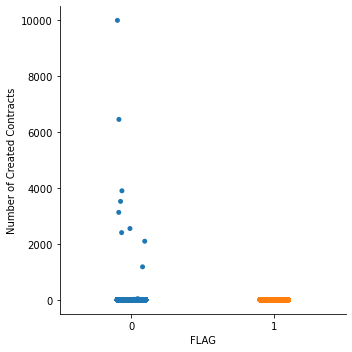

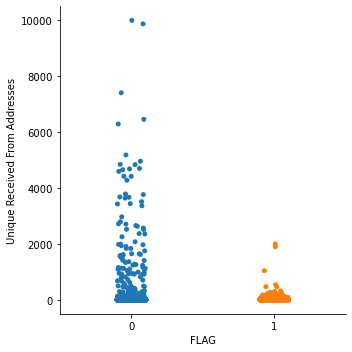

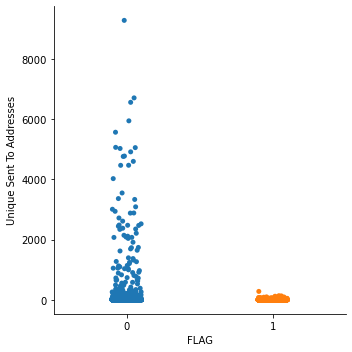

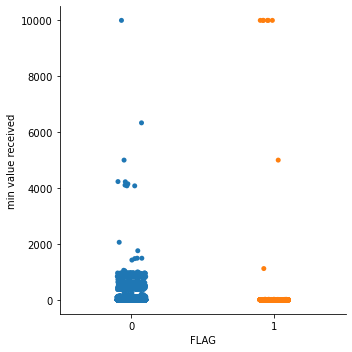

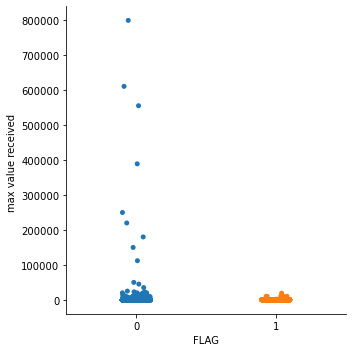

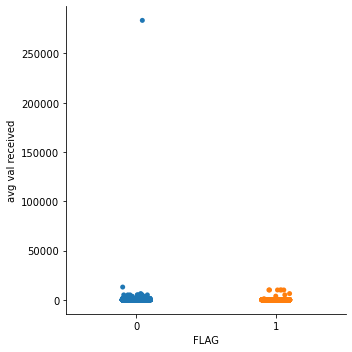

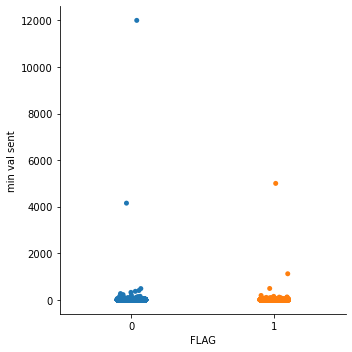

In [58]:
sns.boxplot(x='FLAG', y='Avg min between sent tnx', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Avg min between received tnx', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Time Diff between first and last (Mins)', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Sent tnx', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Received Tnx', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Number of Created Contracts', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Unique Received From Addresses', data=df)

plt.show() 

sns.boxplot(x='FLAG', y='Unique Sent To Addresses', data=df)

plt.show() 

sns.boxplot(x='FLAG', y='min value received', data=df)

plt.show() 

sns.boxplot(x='FLAG', y='max value received ', data=df)

plt.show() 

sns.boxplot(x='FLAG', y='avg val received', data=df)

plt.show() 

sns.boxplot(x='FLAG', y='min val sent', data=df)

plt.show() 

sns.catplot(x='FLAG', y='min val sent', data=df)

sns.catplot(x='FLAG', y='Avg min between sent tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Avg min between received tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Time Diff between first and last (Mins)', data=df)

plt.show()

sns.catplot(x='FLAG', y='Sent tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Received Tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Number of Created Contracts', data=df)

plt.show()



sns.catplot(x='FLAG', y='Unique Received From Addresses', data=df)
plt.show() 

sns.catplot(x='FLAG', y='Unique Sent To Addresses', data=df)
plt.show() 

sns.catplot(x='FLAG', y='min value received', data=df)
plt.show() 

sns.catplot(x='FLAG', y='max value received ', data=df)
plt.show() 

sns.catplot(x='FLAG', y='avg val received', data=df)
plt.show() 

sns.catplot(x='FLAG', y='min val sent', data=df)
plt.show() 

En la mayoría de las variables tenemos pares. Es decir , un valor máximo o mínimo. Podemos observar este patrón en la mayoría,para los valores máximos tenemos muy pocos fraudes. En cambio , para los valores mínimos tenemos muchas más Fraudes.
Con esto podemos concluir que la mayoría de los fraudes representan transacciones de menor costo.


comentario

# Analisis Multivariado

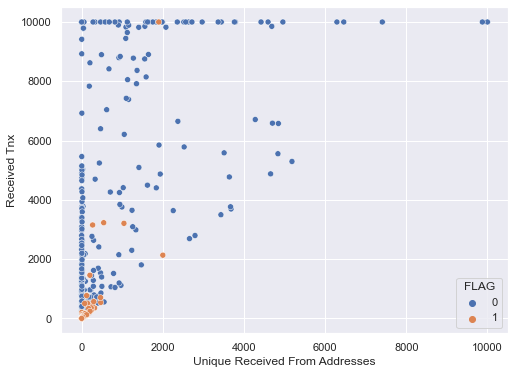

In [60]:
plt.subplots(figsize = (8, 6))
sns.set(style = 'darkgrid')
sns.scatterplot(data = df,x = 'Unique Received From Addresses', y= 'Received Tnx',hue = 'FLAG' )
plt.show()





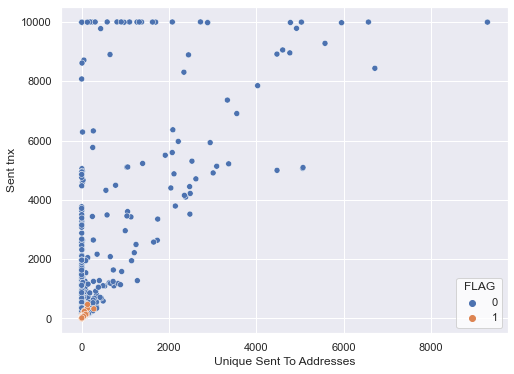

In [61]:
plt.subplots(figsize = (8, 6))
sns.set(style = 'whitegrid')
sns.scatterplot(data = df,x = 'Unique Sent To Addresses', y= 'Sent tnx',hue = 'FLAG' )
plt.show()


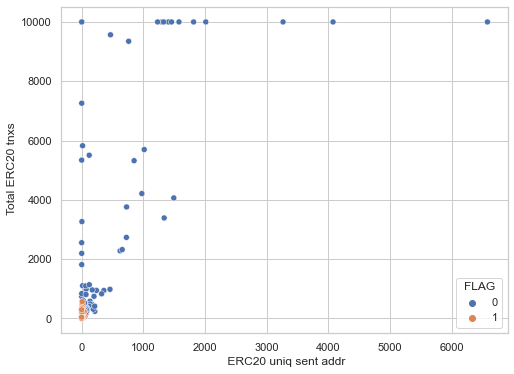

In [62]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = ' ERC20 uniq sent addr', y= ' Total ERC20 tnxs',hue = 'FLAG' )
plt.show()



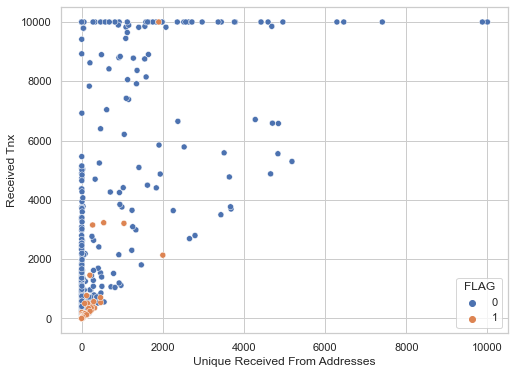

In [63]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'Unique Received From Addresses', y= 'Received Tnx',hue = 'FLAG' )
plt.show()

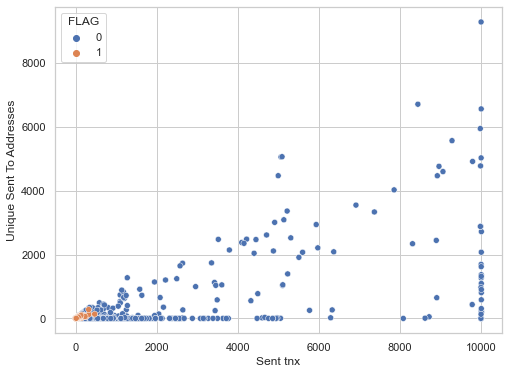

In [64]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'Sent tnx', y= 'Unique Sent To Addresses',hue = 'FLAG' )
plt.show()



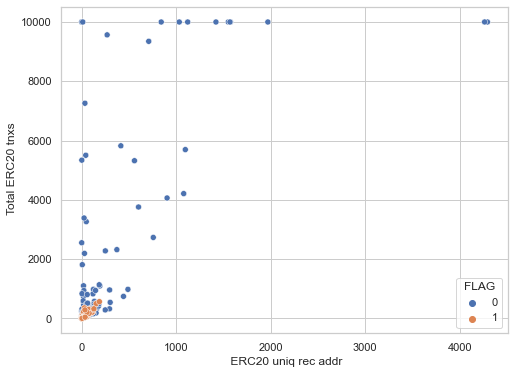

In [65]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = ' ERC20 uniq rec addr', y= ' Total ERC20 tnxs',hue = 'FLAG' )
plt.show()




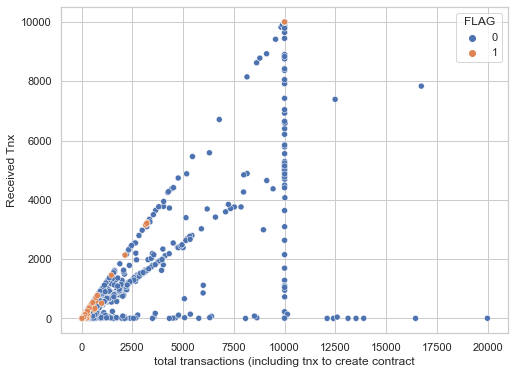

In [66]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'total transactions (including tnx to create contract', y= 'Received Tnx',hue = 'FLAG' )
plt.show()




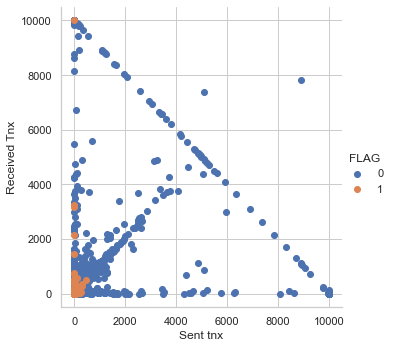

In [67]:
#Analizo la variable target vs los envios de trx y las recividas
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,'Sent tnx','Received Tnx').add_legend();


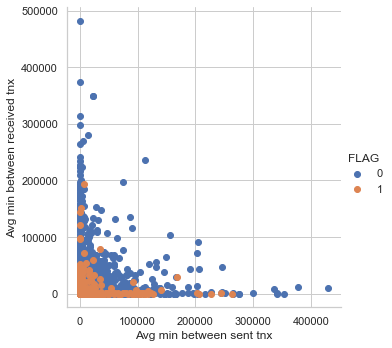

In [68]:
#Analizo la variable targer vs el promedio minimo de enviados y recibidos
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,'Avg min between sent tnx','Avg min between received tnx').add_legend();

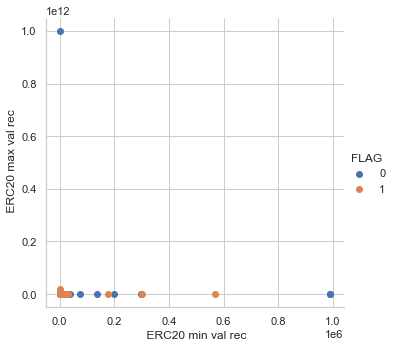

In [69]:
#Analizo la variable target vs ERC20 min val rec y ERC20 max val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,' ERC20 min val rec',' ERC20 max val rec').add_legend();

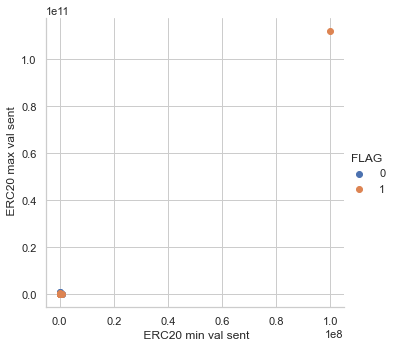

In [70]:
#Analizo la variable target vs ERC20 min val sent y ERC20 max val sent
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 min val sent',' ERC20 max val sent').add_legend();


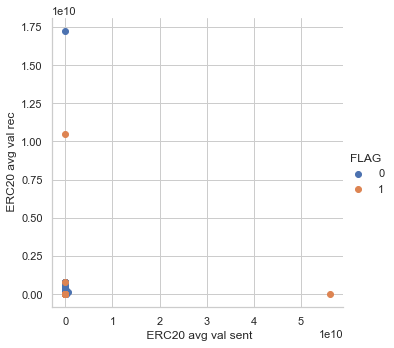

In [71]:
#Analizo la variable target vs ERC20 avg val sent y ERC20 avg val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 avg val sent',' ERC20 avg val rec').add_legend();


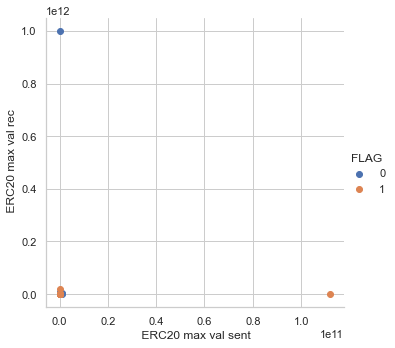

In [72]:
#Analizo la variable target vs ERC20 max val sent y ERC20 max val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 max val sent',' ERC20 max val rec').add_legend();

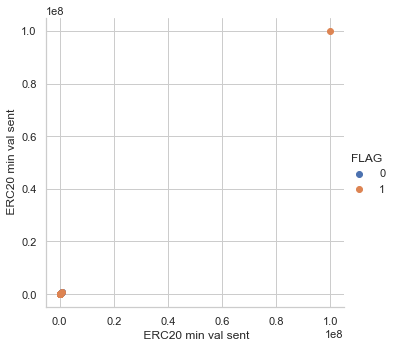

In [73]:
#Analizo la variable target vs ERC20 min val sent y ERC20 min val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 min val sent',' ERC20 min val sent').add_legend();

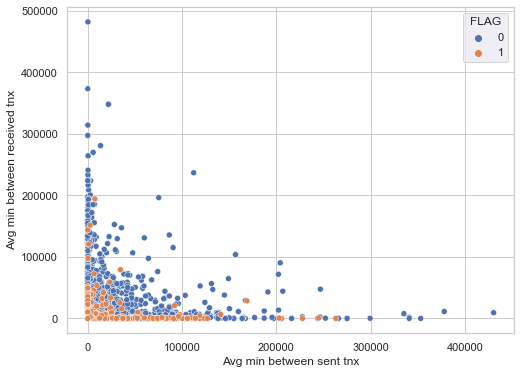

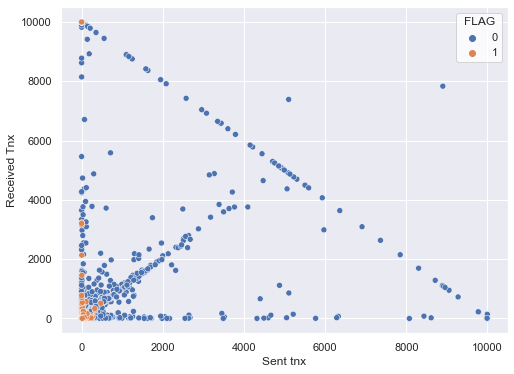

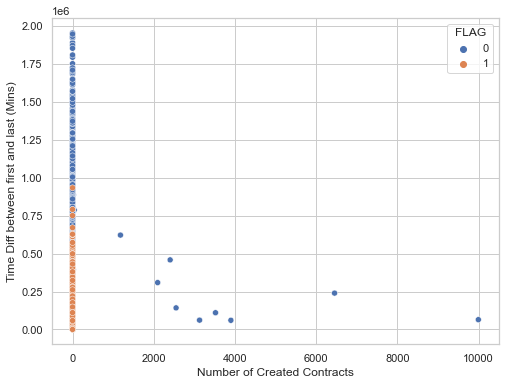

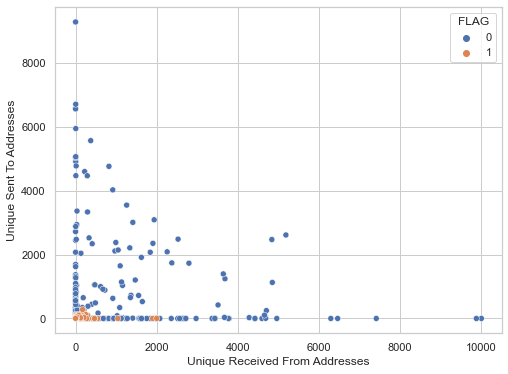

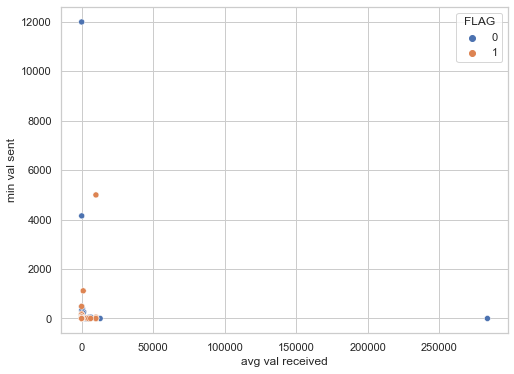

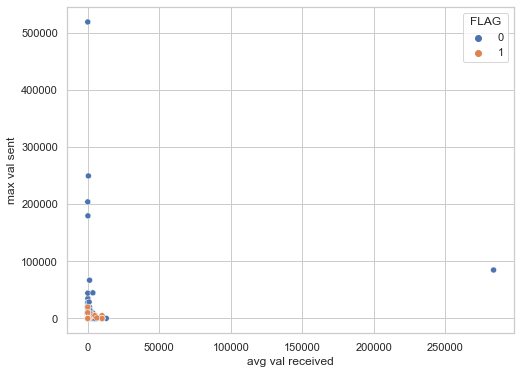

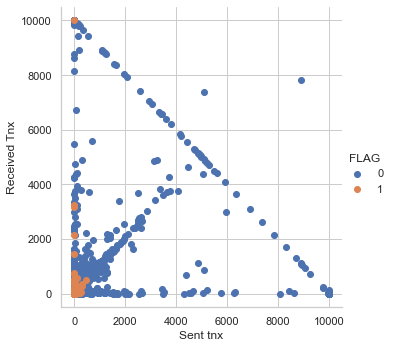

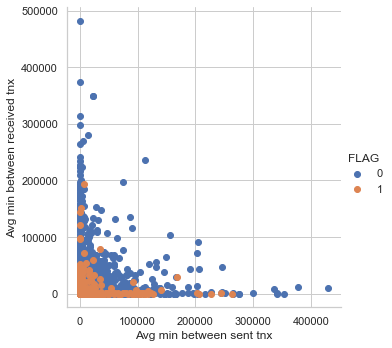

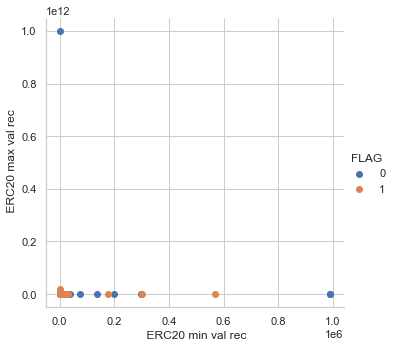

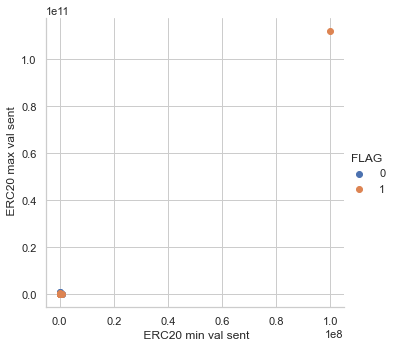

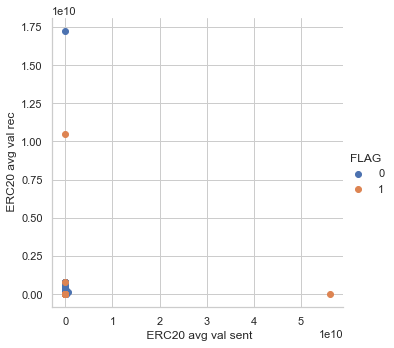

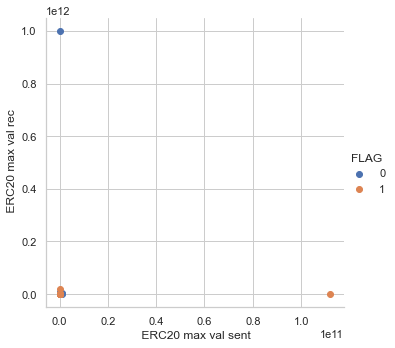

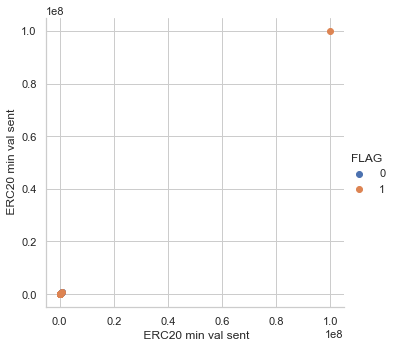

In [74]:
#Comienzo a Analizar  las sigueintes variables
#'Avg min between sent tnx',
#'Avg min between received tnx', 

# 'Time Diff between first and last (Mins)', 

#'Sent tnx', 'Received Tnx',        
#'Number of Created Contracts', 
#'Unique Received From Addresses',
#'Unique Sent To Addresses', 
#'min value received', 
#'max value received ',  
#'avg val received', 
#'min val sent', 
#'max val sent', 
#'avg val sent',        


plt.subplots(figsize = (8, 6))
sns.set(style = 'darkgrid')
sns.scatterplot(data = df,x = 'Avg min between sent tnx', y= 'Avg min between received tnx',hue = 'FLAG' )
plt.show()

plt.subplots(figsize = (8, 6))
sns.set(style = 'whitegrid')
sns.scatterplot(data = df,x = 'Sent tnx', y= 'Received Tnx',hue = 'FLAG' )
plt.show()

plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'Number of Created Contracts', y= 'Time Diff between first and last (Mins)',hue = 'FLAG' )
plt.show()


plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'Unique Received From Addresses', y= 'Unique Sent To Addresses',hue = 'FLAG' )
plt.show()

plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'avg val received', y= 'min val sent',hue = 'FLAG' )
plt.show()

plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'avg val received', y= 'max val sent',hue = 'FLAG' )
plt.show()


#Analizo la variable target vs los envios de trx y las recividas
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,'Sent tnx','Received Tnx').add_legend();


#Analizo la variable targer vs el promedio minimo de enviados y recibidos
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,'Avg min between sent tnx','Avg min between received tnx').add_legend();

#Analizo la variable target vs ERC20 min val rec y ERC20 max val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,' ERC20 min val rec',' ERC20 max val rec').add_legend();

#Analizo la variable target vs ERC20 min val sent y ERC20 max val sent
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 min val sent',' ERC20 max val sent').add_legend();


#Analizo la variable target vs ERC20 avg val sent y ERC20 avg val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 avg val sent',' ERC20 avg val rec').add_legend();


#Analizo la variable target vs ERC20 max val sent y ERC20 max val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 max val sent',' ERC20 max val rec').add_legend();

#Analizo la variable target vs ERC20 min val sent y ERC20 min val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 min val sent',' ERC20 min val sent').add_legend();

Con todo el análisis multivariado que realizamos, podemos concluir que los fraudes se van en la mayoría de los valores mínimos , es decir, que más tienden a cero.
Podemos marcar más esta tendencia generan indicadores de corte


# Indicadores

In [19]:
df['FLAG_RECEIVED_VS_RECEIVED_ADRESS']  = np.where((df['Received Tnx'] > 4000) &  (df['Unique Received From Addresses'] > 2000) ,1,0) 
df['FLAG_RECEIVED_VS_RECEIVED_ADRESS'].value_counts()



0    9809
1      32
Name: FLAG_RECEIVED_VS_RECEIVED_ADRESS, dtype: int64

FLAG_RECEIVED_VS_RECEIVED_ADRESS : 
    Indicador de corte para las variables : Received Tnx , Unique Received From Addresses , FLAG

In [21]:
df['FLAG_SENT_ADRR_VS_SENT_TRX'] = np.where((df['Unique Sent To Addresses'] > 2000) & (df['Sent tnx'] > 2000),1,0)
df['FLAG_SENT_ADRR_VS_SENT_TRX'].value_counts()

0    9801
1      40
Name: FLAG_SENT_ADRR_VS_SENT_TRX, dtype: int64

FLAG_SENT_ADRR_VS_SENT_TRX : 
 Indicador de corte para las variables : Unique Sent To Addresses , Sent tnx ,FLAG

In [27]:
df['FLAG_ERC20UNIQ_VS_ERC20_TNXS'] = np.where((df[' ERC20 uniq sent addr'] > 1000) & (df[' Total ERC20 tnxs'] > 2000),1,0)
df['FLAG_ERC20UNIQ_VS_ERC20_TNXS'].value_counts()

0    9827
1      14
Name: FLAG_ERC20UNIQ_VS_ERC20_TNXS, dtype: int64

FLAG_ERC20UNIQ_VS_ERC20_TNXS :  Indicador de corte para las variables : ERC20 uniq sent addr , Total ERC20 tnxs , FLAG

In [28]:
df['FLAG_TOTAL_TRX_VS_RECEIVED_TNX'] = np.where((df['total transactions (including tnx to create contract'] > 3250) & (df['Received Tnx'] > 4000),1,0)
df['FLAG_TOTAL_TRX_VS_RECEIVED_TNX'].value_counts()

0    9725
1     116
Name: FLAG_TOTAL_TRX_VS_RECEIVED_TNX, dtype: int64

FLAG_TOTAL_TRX_VS_RECEIVED_TNX : Indicador de corte para las variables : total transactions (including tnx to create contract, Received Tnx, FLAG